# AutoGen Basics
## 4 Basic steps
1. Define configuration list
2. Define the assistant
3. Define the user
4. Initiate chat (solve the task)

In [3]:
%matplotlib inline

from autogen import AssistantAgent, UserProxyAgent,config_list_from_json
from autogen.coding import LocalCommandLineCodeExecutor

In [4]:
from autogen import config_list_from_json


In [6]:
import os
import autogen
from autogen import AssistantAgent, UserProxyAgent
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv('/Users/jasper/Downloads/My_first_agents-main/notebooks/.env')

config_list = {"model": "gpt-3.5-turbo-16k", 
              "api_key": os.environ["OPENAI_API_KEY"]

llm_config = {
    "request_timeout": 600,
    "seed":42,
    "confit_list": config_list,
    "temperature": 0,   
}


assistant = autogen.AssistantAgent(
    name="assistant", 
    llm_config=llm_config)


user_proxy = autogen.UserProxyAgent(
    name="user_proxy", 
    code_execution_config={"executor": autogen.coding.LocalCommandLineCodeExecutor(work_dir="coding-21dec")}
)

# Start the chat
user_proxy.initiate_chat(
    assistant,
    message="Plot a chart of NVDA and TESLA stock price change YTD.",
)

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD.

--------------------------------------------------------------------------------


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [27]:
from pathlib import Path

work_dir = Path("coding")

code_executor = LocalCommandLineCodeExecutor(work_dir=work_dir)

In [29]:
user_proxy = UserProxyAgent("user_proxy", code_execution_config={"executor": code_executor})

In [30]:
#user_proxy.initiate_chat(assistant, message="Plot a chart of any stock price change and compare it to Apple's stock price change in the same period and save it as stock_price_change.png")
user_proxy.initiate_chat(assistant, message="Let's plot a sine wave in dark green color")

user_proxy (to assistant):

Let's plot a sine wave in dark green color

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, here is a Python code snippet using the matplotlib library to plot a sine wave in dark green color:

```python
# Filename: sine_plot.py

import numpy as np
import matplotlib.pyplot as plt

# Generate data for the sine wave
x = np.linspace(0, 10, 1000)
y = np.sin(x)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the sine wave
ax.plot(x, y, color='darkgreen')

# Display the plot
plt.show()
```

You can run this code in a Python environment with numpy and matplotlib installed. If not installed, you could install via pip using the command 'pip install numpy matplotlib'.

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
user_proxy (to 

ChatResult(chat_id=None, chat_history=[{'content': "Let's plot a sine wave in dark green color", 'role': 'assistant', 'name': 'user_proxy'}, {'content': "Sure, here is a Python code snippet using the matplotlib library to plot a sine wave in dark green color:\n\n```python\n# Filename: sine_plot.py\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Generate data for the sine wave\nx = np.linspace(0, 10, 1000)\ny = np.sin(x)\n\n# Create a figure and axis\nfig, ax = plt.subplots()\n\n# Plot the sine wave\nax.plot(x, y, color='darkgreen')\n\n# Display the plot\nplt.show()\n```\n\nYou can run this code in a Python environment with numpy and matplotlib installed. If not installed, you could install via pip using the command 'pip install numpy matplotlib'.", 'role': 'user', 'name': 'assistant'}, {'content': 'exitcode: 0 (execution succeeded)\nCode output: Figure(640x480)\n', 'role': 'assistant', 'name': 'user_proxy'}, {'content': "Great! The Python script has run successfully and it 

In [31]:
#user_proxy.initiate_chat(assistant, message="Plot a chart of any stock price change and compare it to Apple's stock price change in the same period and save it as stock_price_change.png")
user_proxy.initiate_chat(assistant, message="Let's plot a sine wave in dark green color and save the image as coding/sine_in_green.png")

user_proxy (to assistant):

Let's plot a sine wave in dark green color and save the image as coding/sine_in_green.png

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, we can use Python's popular Matplotlib library to do so.

Here is the Python code to generate a plot of a sine function:

```python
# filename: sine_plot.py

import numpy as np
import matplotlib.pyplot as plt

# Generate array of angles from 0 to 2pi
x = np.linspace(0, 2*np.pi, 100)

# Generate sine values
y = np.sin(x)

# Create a new figure and a subplot
fig, ax = plt.subplots()

# Plot sine function with dark green color
ax.plot(x, y, color='darkgreen')

# Set the title and labels
ax.set_title('Sine Wave')
ax.set_xlabel('Angle [rad]')
ax.set_ylabel('sin(x)')

# Save the figure to the desired directory and in PNG format
plt.savefig('coding/sine_in_green.png')

# Close the figure
plt.close(fig)
```

You may put this code in a Python file named `sine_plot.

ChatResult(chat_id=None, chat_history=[{'content': "Let's plot a sine wave in dark green color and save the image as coding/sine_in_green.png", 'role': 'assistant', 'name': 'user_proxy'}, {'content': 'Sure, we can use Python\'s popular Matplotlib library to do so.\n\nHere is the Python code to generate a plot of a sine function:\n\n```python\n# filename: sine_plot.py\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Generate array of angles from 0 to 2pi\nx = np.linspace(0, 2*np.pi, 100)\n\n# Generate sine values\ny = np.sin(x)\n\n# Create a new figure and a subplot\nfig, ax = plt.subplots()\n\n# Plot sine function with dark green color\nax.plot(x, y, color=\'darkgreen\')\n\n# Set the title and labels\nax.set_title(\'Sine Wave\')\nax.set_xlabel(\'Angle [rad]\')\nax.set_ylabel(\'sin(x)\')\n\n# Save the figure to the desired directory and in PNG format\nplt.savefig(\'coding/sine_in_green.png\')\n\n# Close the figure\nplt.close(fig)\n```\n\nYou may put this code in a Python file

In [32]:
user_proxy.initiate_chat(assistant, message="Plot a chart of any stock price change and compare it to Apple's stock price change in the same period and save it as stock_price_change.png")


user_proxy (to assistant):

Plot a chart of any stock price change and compare it to Apple's stock price change in the same period and save it as stock_price_change.png

--------------------------------------------------------------------------------
assistant (to user_proxy):

We will use 'yfinance' library in Python which allows to download stock data from Yahoo finance. We will also use 'matplotlib' library for plotting.

Here's the steps we will follow:
1. Import the required libraries.
2. Download the data for a specific stock and Apple's stock.
3. Calculate the daily percentage change for both stocks.
4. Plot both stock price changes on the same chart.
5. Compare the trends and finally save the plotted chart.

In case we need to install 'yfinance', you should execute the following command.
```shell
pip install yfinance matplotlib pandas
```

Here is the python code to do it:

```python

# filename: stock_price_change.py

import yfinance as yf
import matplotlib.pyplot as plt

# Do

ChatResult(chat_id=None, chat_history=[{'content': "Plot a chart of any stock price change and compare it to Apple's stock price change in the same period and save it as stock_price_change.png", 'role': 'assistant', 'name': 'user_proxy'}, {'content': 'We will use \'yfinance\' library in Python which allows to download stock data from Yahoo finance. We will also use \'matplotlib\' library for plotting.\n\nHere\'s the steps we will follow:\n1. Import the required libraries.\n2. Download the data for a specific stock and Apple\'s stock.\n3. Calculate the daily percentage change for both stocks.\n4. Plot both stock price changes on the same chart.\n5. Compare the trends and finally save the plotted chart.\n\nIn case we need to install \'yfinance\', you should execute the following command.\n```shell\npip install yfinance matplotlib pandas\n```\n\nHere is the python code to do it:\n\n```python\n\n# filename: stock_price_change.py\n\nimport yfinance as yf\nimport matplotlib.pyplot as plt\n\n

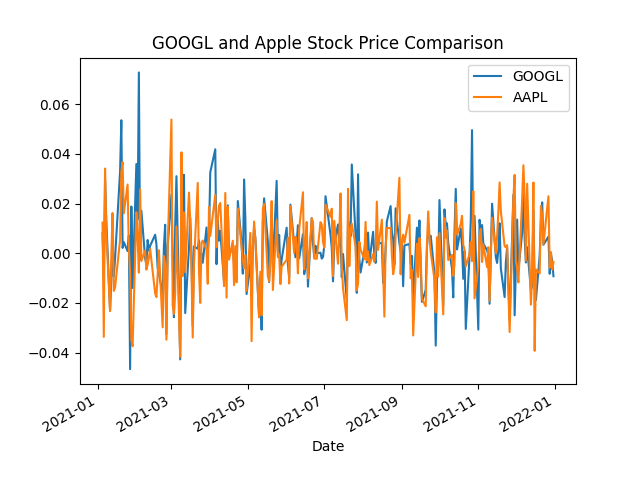

In [33]:
from IPython.display import Image

Image("coding/stock_price_change.png")

In [2]:
def execute_agent(prompt):
    return user_proxy.initiate_chat(assistant, message=prompt)


execute_agent('Fetch 5 papers about using large language models to augment human productivity and summarize them into a one single research report file\
    named research-report-llms-productivity.md')

NameError: name 'user_proxy' is not defined

In [1]:
from IPython.display import Markdown

with open("coding/research-report-llms-productivity.md") as f:
    report = f.read()


Markdown(report)

FileNotFoundError: [Errno 2] No such file or directory: 'coding/research-report-llms-productivity.md'